In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
orig_df = pd.read_csv("data/pokemon_stat_generation8_all.csv", index_col=0, dtype={"GalarPokedex": "int64"})
galar_df = orig_df.loc[orig_df["GalarPokedex"] == 1]
galar_df.head()

,Japanese,English,German,French,Korean,Simplified Chinese,Traditional Chinese,Generation,Form,H,...,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag,GalarPokedex
No,,,,,,,,,,,,,,,,,,,,,
4,ヒトカゲ,Charmander,Glumanda,Salameche,파이리,小火龙,小火龍,1,-,39,...,50,65,もうか,-,サンパワー,ほのお,-,8.5,0,1
5,リザード,Charmeleon,Glutexo,Reptincel,리자드,火恐龙,火恐龍,1,-,58,...,65,80,もうか,-,サンパワー,ほのお,-,19.0,0,1
6,リザードン,Charizard,Glurak,Dracaufeu,리자몽,喷火龙,噴火龍,1,-,78,...,85,100,もうか,-,サンパワー,ほのお,ひこう,100.5,1,1
10,キャタピー,Caterpie,Raupy,Chenipan,캐터피,绿毛虫,綠毛蟲,1,-,45,...,20,45,りんぷん,-,にげあし,むし,-,2.9,0,1
11,トランセル,Metapod,Safcon,Chrysacier,단데기,铁甲蛹,鐵甲蛹,1,-,50,...,25,30,だっぴ,-,-,むし,-,9.9,0,1


In [4]:
galar_df.loc[galar_df["Form"] != "-", "Name"] = galar_df.loc[galar_df["Form"] != "-", "Japanese"] + "(" + galar_df.loc[galar_df["Form"] != "-", "Form"] + ")"
galar_df.loc[galar_df["Name"].isnull(), "Name"] = galar_df.loc[galar_df["Name"].isnull(), "Japanese"]
galar_df.head()

/home/nersonu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nersonu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Japanese,English,German,French,Korean,Simplified Chinese,Traditional Chinese,Generation,Form,H,...,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag,GalarPokedex,Name
No,,,,,,,,,,,,,,,,,,,,,
4,ヒトカゲ,Charmander,Glumanda,Salameche,파이리,小火龙,小火龍,1,-,39,...,65,もうか,-,サンパワー,ほのお,-,8.5,0,1,ヒトカゲ
5,リザード,Charmeleon,Glutexo,Reptincel,리자드,火恐龙,火恐龍,1,-,58,...,80,もうか,-,サンパワー,ほのお,-,19.0,0,1,リザード
6,リザードン,Charizard,Glurak,Dracaufeu,리자몽,喷火龙,噴火龍,1,-,78,...,100,もうか,-,サンパワー,ほのお,ひこう,100.5,1,1,リザードン
10,キャタピー,Caterpie,Raupy,Chenipan,캐터피,绿毛虫,綠毛蟲,1,-,45,...,45,りんぷん,-,にげあし,むし,-,2.9,0,1,キャタピー
11,トランセル,Metapod,Safcon,Chrysacier,단데기,铁甲蛹,鐵甲蛹,1,-,50,...,30,だっぴ,-,-,むし,-,9.9,0,1,トランセル


In [10]:
need_col = ["Name", "Generation", "H", "A", "B", "C", "D", "S", "Ability1", "Ability2", "Ability3", "Type1", "Type2", "Weight", "Evolve Flag"]
galar_df = galar_df.loc[:, need_col]
# ザシアン・ザマゼンタ・ムゲンダイナはランクバトルで使えないから除く
galar_df = galar_df.loc[galar_df.index < 888]
galar_df.head()

,Name,Generation,H,A,B,C,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag
No,,,,,,,,,,,,,,,
4,ヒトカゲ,1,39,52,43,60,50,65,もうか,-,サンパワー,ほのお,-,8.5,0
5,リザード,1,58,64,58,80,65,80,もうか,-,サンパワー,ほのお,-,19.0,0
6,リザードン,1,78,84,78,109,85,100,もうか,-,サンパワー,ほのお,ひこう,100.5,1
10,キャタピー,1,45,30,35,20,20,45,りんぷん,-,にげあし,むし,-,2.9,0
11,トランセル,1,50,20,55,25,25,30,だっぴ,-,-,むし,-,9.9,0


In [11]:
base_stats_col = ["H", "A", "B", "C", "D", "S"]
galar_df.loc[:, base_stats_col].describe()

,H,A,B,C,D,S
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,65.597619,74.078571,72.440476,65.697619,69.226190,62.140476
std,24.117799,29.374644,29.605259,27.913205,26.700921,27.721799
min,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000
25%,50.000000,50.000000,50.000000,45.000000,50.000000,40.000000
50%,63.000000,70.000000,68.500000,60.000000,65.000000,60.000000
75%,76.000000,95.000000,90.000000,85.000000,85.000000,80.000000
max,190.000000,160.000000,230.000000,145.000000,230.000000,160.000000


In [14]:
# 最終進化のみ
galar_last_evos = galar_df.loc[galar_df["Evolve Flag"] == 1, :]
galar_last_evos.loc[:, base_stats_col].describe()

,H,A,B,C,D,S
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,77.388393,89.183036,86.049107,79.397321,83.321429,72.330357
std,23.010741,26.580742,28.551461,27.209175,24.917339,28.928515
min,1.000000,10.000000,20.000000,10.000000,20.000000,5.000000
25%,62.750000,65.000000,65.000000,60.000000,66.750000,53.000000
50%,72.500000,90.000000,80.000000,80.000000,80.000000,70.500000
75%,90.000000,106.250000,100.000000,97.000000,95.250000,90.250000
max,190.000000,160.000000,230.000000,145.000000,230.000000,160.000000


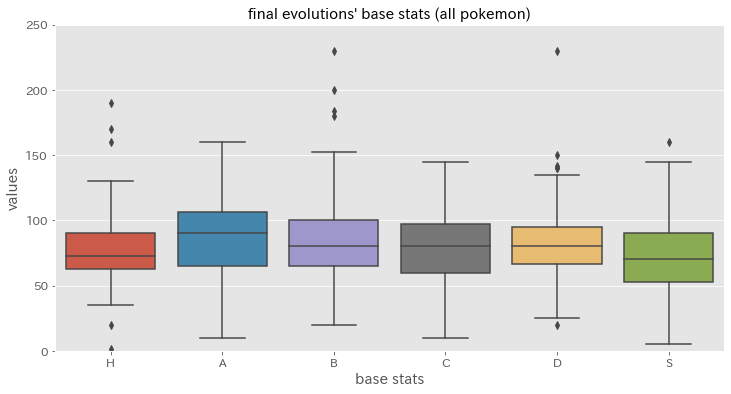

In [54]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
sns.boxplot(x="variable", y="value", data=pd.melt(galar_last_evos.loc[:, base_stats_col]), ax=ax)
ax.set_ylim([0, 250])
ax.set_title("final evolutions' base stats (all pokemon)", fontsize=15)
ax.tick_params(labelsize=12)
ax.set_ylabel("values", fontsize=15)
ax.set_xlabel("base stats", fontsize=15)
plt.show()

Text(0.5, 0, 'types')

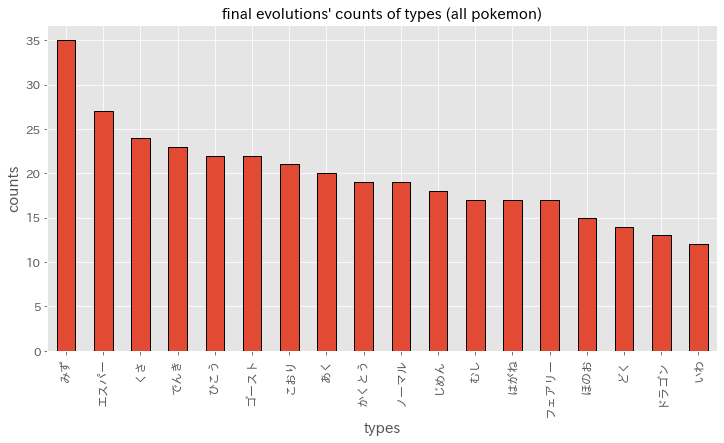

In [141]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
tmp_df = pd.melt(galar_last_evos.loc[:, ["Type1", "Type2"]])
tmp_df = tmp_df.loc[tmp_df["value"] != "-", "value"]                    
tmp_df.value_counts().plot(kind="bar", ax=ax, edgecolor="black", linewidth=1)
ax.set_title("final evolutions' counts of types (all pokemon)", fontsize=15)
ax.tick_params(labelsize=12)
ax.set_ylabel("counts", fontsize=15)
ax.set_xlabel("types", fontsize=15)

In [63]:
# ガラルの最終進化のみ
galar_last_evos_new_pokemon = galar_last_evos.loc[galar_last_evos["Generation"] == 8, :]
galar_last_evos_new_pokemon.loc[:, base_stats_col].describe()

,H,A,B,C,D,S
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,78.867925,95.603774,84.207547,81.528302,79.528302,73.566038
std,18.296740,23.426103,22.907304,27.264096,21.157472,31.015201
min,48.000000,45.000000,50.000000,20.000000,20.000000,15.000000
25%,65.000000,85.000000,65.000000,65.000000,68.000000,55.000000
50%,72.000000,95.000000,80.000000,80.000000,80.000000,71.000000
75%,90.000000,110.000000,100.000000,95.000000,90.000000,90.000000
max,122.000000,160.000000,145.000000,145.000000,130.000000,142.000000


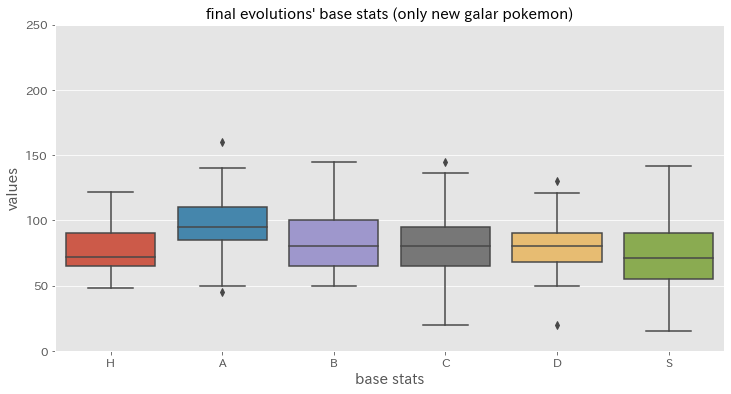

In [86]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
sns.boxplot(x="variable", y="value", data=pd.melt(galar_last_evos_new_pokemon.loc[:, base_stats_col]), ax=ax)
ax.set_title("final evolutions' base stats (only new galar pokemon)", fontsize=15)
ax.set_ylim([0, 250])
ax.tick_params(labelsize=12)
ax.set_ylabel("values", fontsize=15)
ax.set_xlabel("base stats", fontsize=15)
plt.show()

Text(0.5, 0, 'types')

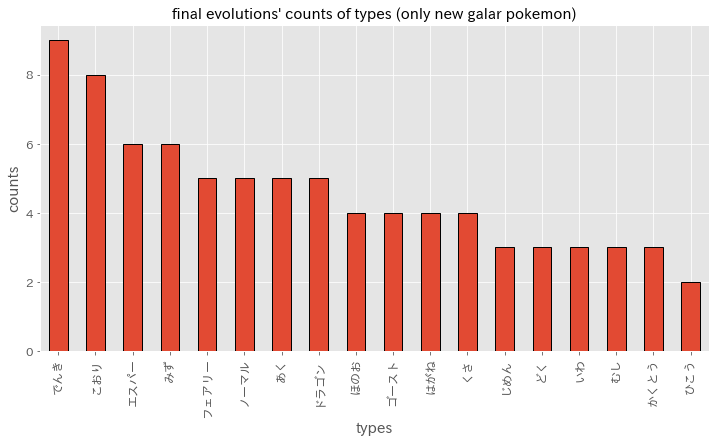

In [142]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
tmp_df = pd.melt(galar_last_evos_new_pokemon.loc[:, ["Type1", "Type2"]])
tmp_df = tmp_df.loc[tmp_df["value"] != "-", "value"]                    
tmp_df.value_counts().plot(kind="bar", ax=ax, edgecolor="black", linewidth=1)
ax.set_title("final evolutions' counts of types (only new galar pokemon)", fontsize=15)
ax.tick_params(labelsize=12)
ax.set_ylabel("counts", fontsize=15)
ax.set_xlabel("types", fontsize=15)

In [65]:
galar_last_evos_new_pokemon.sort_values(by="B", ascending=False).head(10)

,Name,Generation,H,A,B,C,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag
No,,,,,,,,,,,,,,,
866,デスバーン,8,58,95,145,50,105,30,さまようたましい,-,-,じめん,ゴースト,66.6,1
878,イシヘンジン,8,100,125,135,20,20,70,パワースポット,-,-,いわ,-,520.0,1
865,サダイジャ,8,72,107,125,65,70,71,すなはき,だっぴ,すながくれ,じめん,-,65.5,1
842,セキタンザン,8,110,80,120,80,90,30,じょうききかん,ほのおのからだ,もらいび,いわ,ほのお,310.5,1
110,マタドガス(ガラルのすがた),8,65,90,120,85,70,60,ふゆう,かがくへんかガス,-,どく,フェアリー,16.0,1
880,ジュラルドン,8,70,95,115,120,50,85,ライトメタル,ヘヴィメタル,すじがねいり,はがね,ドラゴン,40.0,1
879,コオリッポ(アイスフェイスのすがた),8,75,80,110,65,90,50,アイスフェイス,-,-,こおり,-,89.0,1
821,イオルブ,8,60,45,110,80,120,90,むしのしらせ,おみとおし,テレパシー,むし,エスパー,40.8,1
824,アーマーガア,8,98,87,105,53,85,67,プレッシャー,きんちょうかん,ミラーアーマー,ひこう,はがね,75.0,1


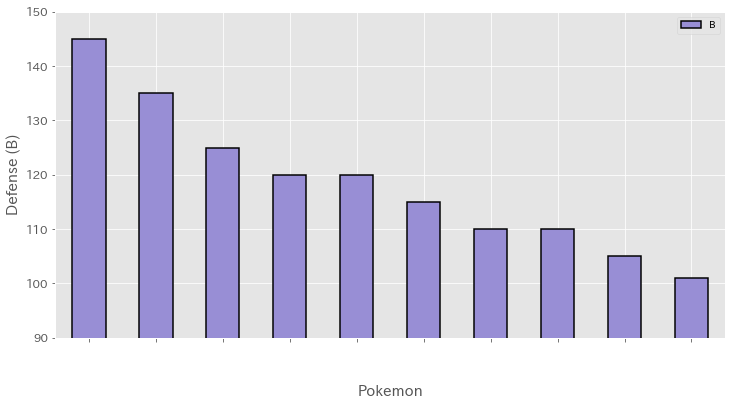

In [117]:
current_palette = sns.color_palette()
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
galar_last_evos_new_pokemon.loc[:, ["Name", "B"]].sort_values(by="B", ascending=False).head(10).plot(kind="bar", ax=ax, edgecolor="black",
                                                                                                     linewidth=1.5, color=current_palette[2:])
ax.tick_params(labelsize=12)
ax.set_ylim([90, 150])
ax.set_ylabel("Defense (B)", fontsize=15)
ax.set_xlabel("Pokemon", fontsize=15)
ax.set_xticklabels(["　　　"]*10)
plt.show()

In [66]:
galar_last_evos_new_pokemon.sort_values(by="D", ascending=False).head(10)

,Name,Generation,H,A,B,C,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag
No,,,,,,,,,,,,,,,
852,サニゴーン,8,60,95,50,145,130,30,くだけるよろい,-,ほろびのボディ,ゴースト,-,0.4,1
847,マホイップ,8,65,60,75,110,121,64,スイートベール,-,アロマベール,フェアリー,-,0.5,1
821,イオルブ,8,60,45,110,80,120,90,むしのしらせ,おみとおし,テレパシー,むし,エスパー,40.8,1
837,ワタシラガ,8,60,50,90,80,120,60,わたげ,さいせいりょく,ほうし,くさ,-,2.5,1
868,ポットデス,8,60,65,65,134,114,70,くだけるよろい,-,-,ゴースト,-,0.4,1
866,デスバーン,8,58,95,145,50,105,30,さまようたましい,-,-,じめん,ゴースト,66.6,1
869,イエッサン(メスのすがた),8,70,55,65,95,105,85,マイペース,シンクロ,サイコメイカー,ノーマル,エスパー,28.0,1
858,ブリムオン,8,57,90,95,136,103,29,いやしのこころ,きけんよち,マジックミラー,エスパー,フェアリー,5.1,1
877,バリコオル,8,80,85,75,110,100,70,ちどりあし,バリアフリー,アイスボディ,こおり,エスパー,58.2,1


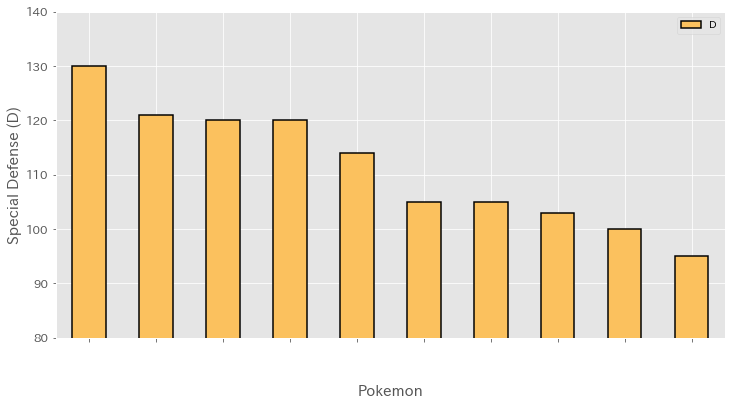

In [118]:
current_palette = sns.color_palette()
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
galar_last_evos_new_pokemon.loc[:, ["Name", "D"]].sort_values(by="D", ascending=False).head(10).plot(kind="bar", ax=ax, edgecolor="black",
                                                                                                     linewidth=1.5, color=current_palette[4:])
ax.tick_params(labelsize=12)
ax.set_ylim([80, 140])
ax.set_ylabel("Special Defense (D)", fontsize=15)
ax.set_xlabel("Pokemon", fontsize=15)
ax.set_xticklabels(["　　　"]*10)
plt.show()